# Description

## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective


1.   To predict whether a liability customer will buy a personal loan or not.

2.   Which variables are most significant.

3.   Which segment of customers should be targeted more.






## Data Description

**Data Dictionary** 

- ID:  Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (in thousand dollars)
- ZIP Code: Home Address ZIP code.
- Family: the Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (in thousand dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities_Account: Does the customer have securities account with the bank?
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Do customers use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Let's start coding!

## Importing necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)




# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

In [2]:
# loading the dataset
data = pd.read_csv("Loan_Modelling.csv")

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [5]:
data["ID"].nunique()

5000

## Observations

- `ID` is just an index for the data entry and will add no value to our analysis. So, we will drop it.

- All the columns here contains numerical veriable.

- There seems to be no missing values. But as this is noly the sample data, it needs further investigation.

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [7]:
# drop the ID column as it does not add any value to the analysis
df.drop("ID", axis=1, inplace=True)

In [8]:

# Also replacing the categorical var with actual values
df['Education'] = df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [9]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   object 
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


# Observations

- The data is well-organized as there is no missing value.

- `Education` is of data categorical type. 

- `Personal_Loan` , `Securities_Account` ,`CD_Account` , `Online` , `CreditCard` is of data boolean type. 


- Only `CCAvg` is of data float type. The rest of the columns are of integer type.

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

- There is no duplicate value in the data.


# Data Preprocessing

# Processing columns
- Let's process the categorical columns to extract numerical values from them.

# Create Dummy Variables

Values like 'Undergrad' cannot be read into an equation. Using substitutes like 1 for Undergrad, 2 for Graduate and 3 for Professional would end up implying that Grad degrees fall exactly half way between Undergrad and Professional degrees! We dont want to impose such a baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this degree Undergrad level?", "Is this degree Grad level?" and "Is this person from Professional level?". These will be used as independent variables without imposing any kind of ordering between the three regions.

In [11]:
df = pd.get_dummies(df, columns=['Education'])
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0


In [12]:
#Let's review the data information once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5000 non-null   int64  
 1   Experience              5000 non-null   int64  
 2   Income                  5000 non-null   int64  
 3   ZIPCode                 5000 non-null   int64  
 4   Family                  5000 non-null   int64  
 5   CCAvg                   5000 non-null   float64
 6   Mortgage                5000 non-null   int64  
 7   Personal_Loan           5000 non-null   int64  
 8   Securities_Account      5000 non-null   int64  
 9   CD_Account              5000 non-null   int64  
 10  Online                  5000 non-null   int64  
 11  CreditCard              5000 non-null   int64  
 12  Education_Graduate      5000 non-null   uint8  
 13  Education_Professional  5000 non-null   uint8  
 14  Education_Undergrad     5000 non-null   

# Observation:

- After applyting dummy variable, the categorical variable has been coverted to uint8 type, which is clearly a great thing for further propagation.

In [13]:
#Let's get a detail description of the processed data
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.26,1759.46,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0


# Observation:

- The income is showing a wide range starting from minimum 8 thousand dollars to a median Income of 64 thousand dollars having a maximum Icome range of 224 thousand dollars. 
- As the experience range also varies from the minimum -3 years to a maximum 43 years, so the huge variation in income range is easily understandable.

- But, there is always a high probability of having outliers which needs further varification.

- The `Age` range also varies from a minimum of 23 years to a maximum of 67 years. This clearly shows the popularity of the bank among differnt generaions of people at the country.

# Feature Engineering¶

In [14]:
# checking Income grouped by Age
df.groupby(["Age"])["Income"].mean().round(2).sort_values(ascending=False)

Age
26    84.05
65    83.86
46    82.20
37    81.25
45    81.12
29    81.06
44    80.98
28    80.97
27    80.80
30    77.29
38    77.26
43    77.03
48    76.19
42    75.90
34    75.88
63    75.06
35    74.53
40    74.46
36    74.36
24    74.21
41    74.19
52    74.12
47    73.63
32    73.62
33    73.33
64    73.18
54    71.90
39    71.30
31    70.82
62    70.50
53    70.21
56    70.21
49    69.47
58    69.24
50    69.12
59    68.08
51    67.94
61    67.30
23    67.25
25    66.98
60    66.83
57    65.90
55    65.82
67    62.17
66    60.71
Name: Income, dtype: float64

- The Zip column in the current format might not be very useful in our analysis.
- We try to get the name of the country from the Zip codes  to be useful in prediction.

In [16]:
!pip install uszipcode

In [17]:
from uszipcode import SearchEngine
search = SearchEngine()
county = []

for i in np.arange(0, len(df['ZIPCode'])):
  zipcode = search.by_zipcode(df['ZIPCode'][i])
  county.append(zipcode.county)

df['county'] = county
df.head()

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,county
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1,Los Angeles County
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1,Los Angeles County
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1,Alameda County
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0,San Francisco County
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0,Los Angeles County


# Observation:
- We have successfully derived the related couty name from the ZIPCode.

In [21]:
df.groupby(["county"])["Income"].mean().round(2).sort_values(ascending=False)

county
Mendocino County          101.12
Merced County              88.25
San Luis Obispo County     87.67
San Bernardino County      80.46
Contra Costa County        80.15
Santa Clara County         78.17
El Dorado County           77.47
Monterey County            77.08
Orange County              76.55
Santa Cruz County          75.97
Los Angeles County         75.51
Shasta County              74.56
Sonoma County              73.93
Alameda County             73.36
San Diego County           73.16
Ventura County             72.46
Fresno County              72.08
Butte County               71.79
Kern County                71.30
San Mateo County           70.78
Trinity County             70.25
Santa Barbara County       70.05
Marin County               69.96
Sacramento County          69.01
San Joaquin County         68.85
San Francisco County       68.82
Placer County              68.04
Stanislaus County          68.00
Riverside County           67.54
Humboldt County            66.09
Yol

- The average income of county `Mendocino` is showing the highest prospect in terms of thousand dollars. The mean income of this county is 101.12 thousand dollars.



In [22]:
df.groupby(["county"])["Age"].mean().round(2).sort_values(ascending=False)

county
Sonoma County             48.89
Butte County              47.95
Ventura County            47.52
Merced County             47.25
Marin County              47.04
San Francisco County      46.58
Riverside County          46.41
Placer County             46.29
Trinity County            46.25
Santa Barbara County      46.15
Mendocino County          46.00
Monterey County           45.84
Los Angeles County        45.76
Orange County             45.67
San Luis Obispo County    45.48
Shasta County             45.33
San Diego County          45.26
Alameda County            45.22
San Bernardino County     45.17
San Mateo County          45.16
Tuolumne County           45.14
Kern County               44.87
Sacramento County         44.68
Humboldt County           44.50
Yolo County               44.45
Santa Clara County        44.44
Solano County             44.42
San Joaquin County        44.38
Contra Costa County       43.86
Santa Cruz County         43.69
Imperial County           43.67
F

- The highest mean age of people is from `Sonoma` county. The mean age is 48.89 years. 

In [23]:
df.groupby(["county"])["Experience"].mean().round(2).sort_values(ascending=False)

county
Sonoma County             23.61
Butte County              22.37
Ventura County            22.18
Marin County              21.85
Merced County             21.75
San Francisco County      21.31
Riverside County          21.23
Mendocino County          21.00
Placer County             21.00
Trinity County            21.00
Santa Barbara County      20.88
Monterey County           20.60
Los Angeles County        20.51
Orange County             20.48
San Luis Obispo County    20.39
Shasta County             20.17
San Bernardino County     20.12
San Diego County          20.02
Tuolumne County           20.00
San Mateo County          19.96
Alameda County            19.96
Kern County               19.61
Humboldt County           19.53
Sacramento County         19.42
Imperial County           19.33
Solano County             19.33
Santa Clara County        19.21
Yolo County               19.15
San Joaquin County        18.92
Santa Cruz County         18.66
Contra Costa County       18.61
E

- As expected, the highest years of experience does also belong to `Sonoma` county. Because, the age and years of professional experience are correlated to each other.

# Exploratory Data Analysis

#### Let's check the statistical summary of the numerical variables.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5000 non-null   int64  
 1   Experience              5000 non-null   int64  
 2   Income                  5000 non-null   int64  
 3   ZIPCode                 5000 non-null   int64  
 4   Family                  5000 non-null   int64  
 5   CCAvg                   5000 non-null   float64
 6   Mortgage                5000 non-null   int64  
 7   Personal_Loan           5000 non-null   int64  
 8   Securities_Account      5000 non-null   int64  
 9   CD_Account              5000 non-null   int64  
 10  Online                  5000 non-null   int64  
 11  CreditCard              5000 non-null   int64  
 12  Education_Graduate      5000 non-null   uint8  
 13  Education_Professional  5000 non-null   uint8  
 14  Education_Undergrad     5000 non-null   

- Now, county is also a categorical variable which we will process later to covert it into numerical variable using dummy variable.

# Univariate Analysis

### Histogram 

In [26]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

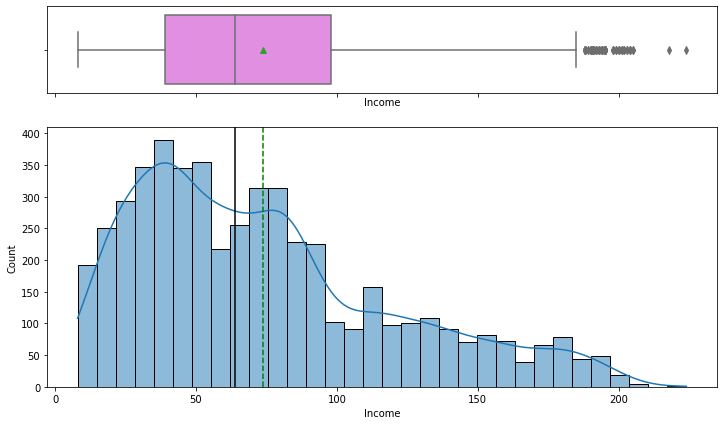

In [27]:
histogram_boxplot(df, "Income", kde=True)

Observations

- This is a highly skewed distribution.
- Let us use log transformation on this column to see if that helps normalize the distribution.

In [28]:
# Creating a new column with the transformed variable
df["Income_log"] = np.log(df["Income"])

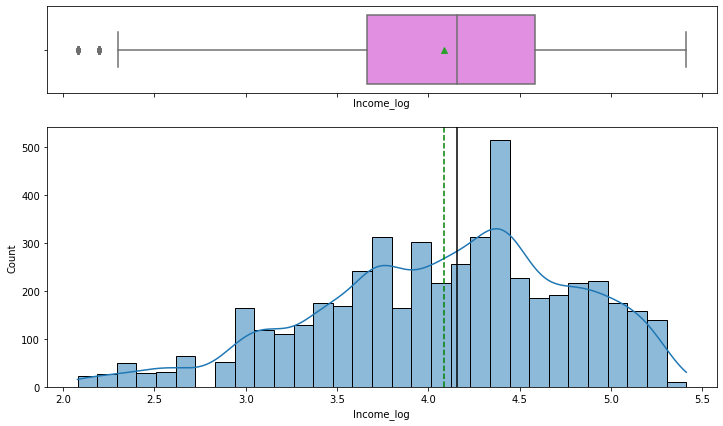

In [29]:
histogram_boxplot(df, "Income_log", kde=True)

- Using the log transformation has definitely helped in reducing the skewness of the Income parameter.

# Age

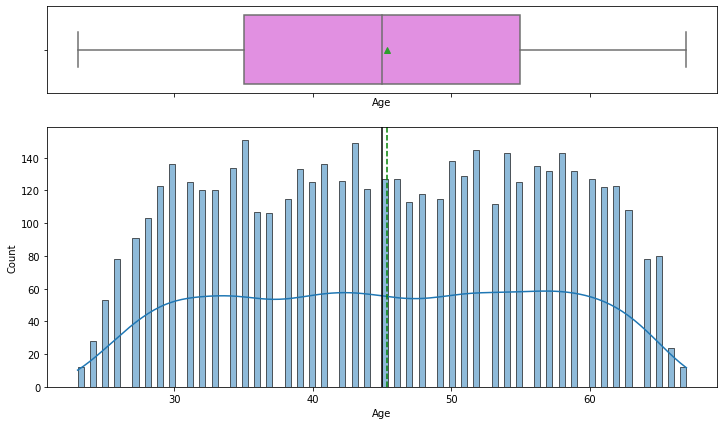

In [30]:
histogram_boxplot(df, "Age", bins=100, kde=True)

Observations

- This shows kind of noramal distribution.
- Though there is no need to use log transformation, let us use log transformation on this column to check whether there is any changes.

In [31]:
df["Age_log"] = np.log(df["Age"])

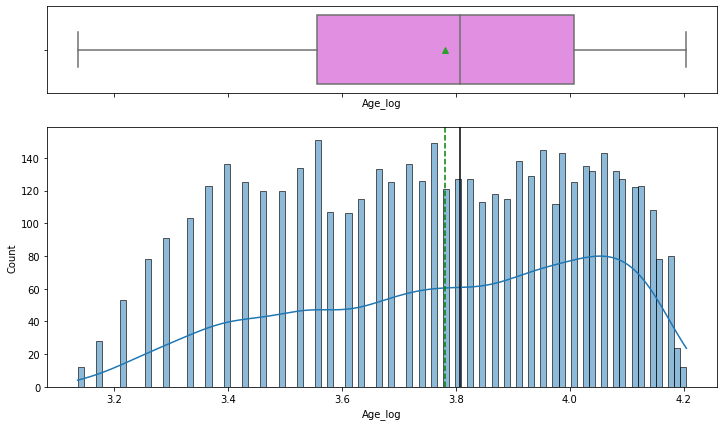

In [32]:
histogram_boxplot(df, "Age_log", bins=100, kde=True)

- Transformation has no influence in skewness.

In [33]:
#Let's drop the Age_log column

df = df.drop('Age_log', axis=1)

In [34]:
#Let's see the data again
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,county,Income_log
0,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1,Los Angeles County,3.891820
1,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1,Los Angeles County,3.526361
2,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1,Alameda County,2.397895
3,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0,San Francisco County,4.605170
4,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0,Los Angeles County,3.806662


### Barplot

In [35]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

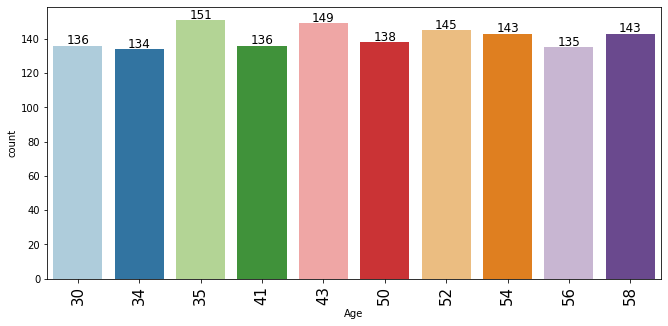

In [37]:
labeled_barplot(df, "Age", perc=False, n=10)

Observations

- People are of Age 35  is the most in numbers in the dataset .

- It is clear from the above charts that our dataset contains people from different generation.

- Moreover, the percentage of people among different generations are pretty close to each other.


# `Bivariate` Distributions

Let's check the correlation between numerical variables.

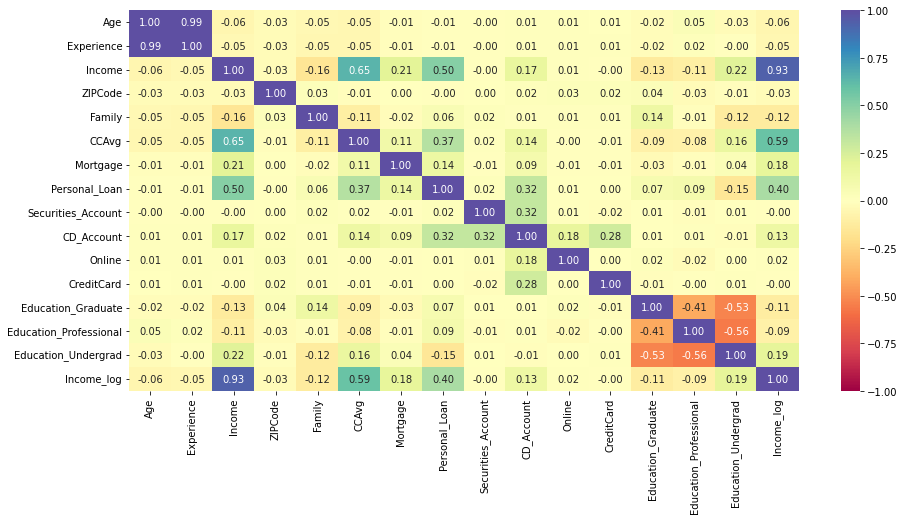

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations

- Age and Experience are important predictors of income, but they are also highly correlated to each other.

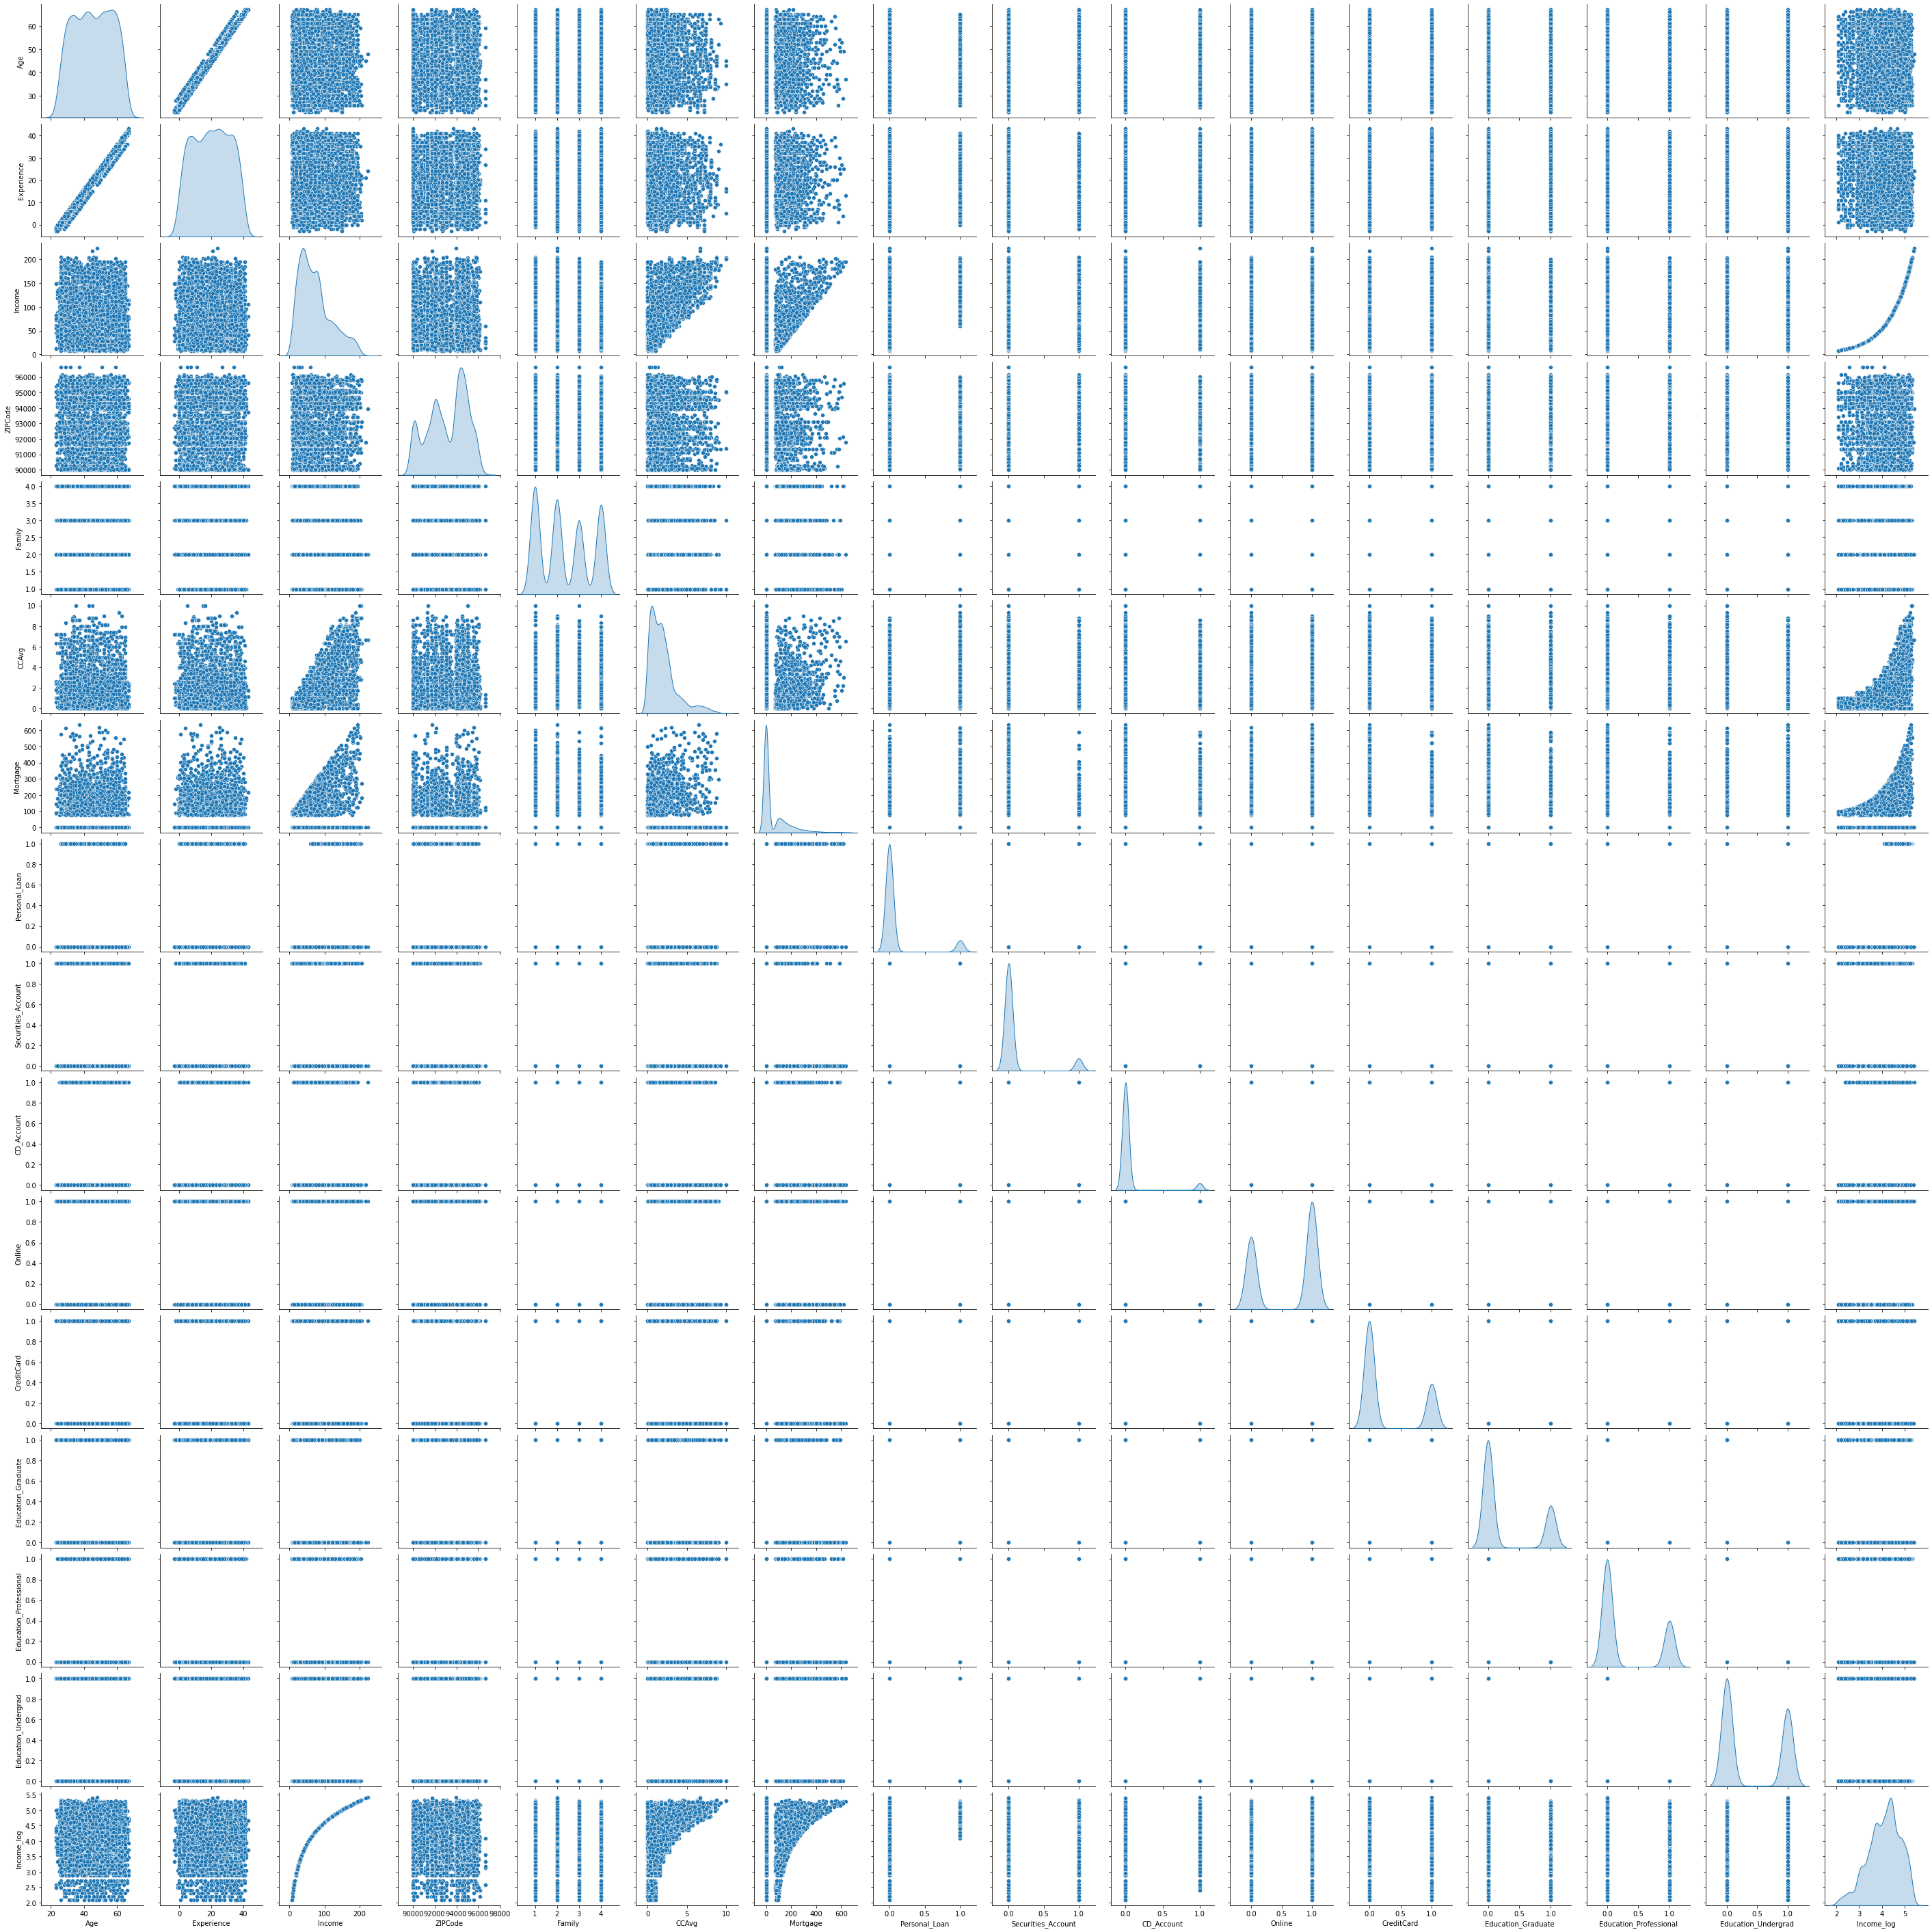

In [39]:
# to plot density curve instead of histogram on the diag
sns.pairplot(df,diag_kind='kde')

#### Observations

Zooming into these plots gives us important information.

- According to intuition, experience and age is showing a positive correlation with each other.



Let's check the variation in Income with Age.

#####  Income vs Age

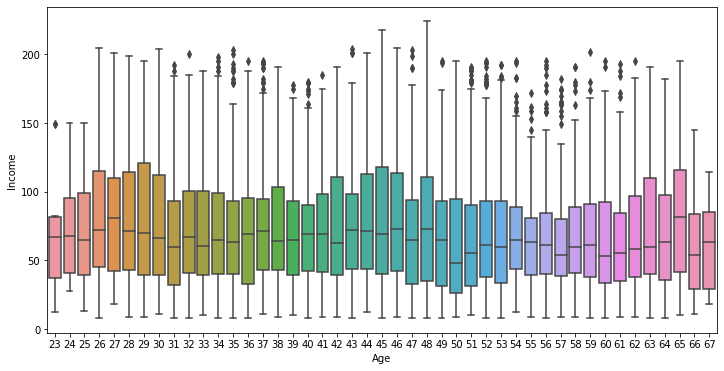

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age", y="Income", data=df)
plt.show()

#### Observations:

- The Income is showing almost more or less similar IQR in different age range.

- But, 29, 45,65 year people are showing a bit higher IQR in terms of Income.

- We are watching some outliers in the upper level as well. This outliers might be a matter of concern or might not which requires further investigation.

#### Income_log vs Age

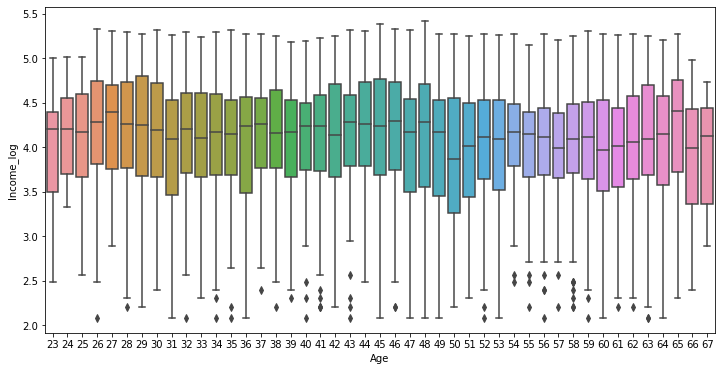

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age", y="Income_log", data=df)
plt.show()

#### Observation:

- As we use the log transformation, the outlier scenario seems to be reduced due to the reduction in skewness.

#### Income vs Experience

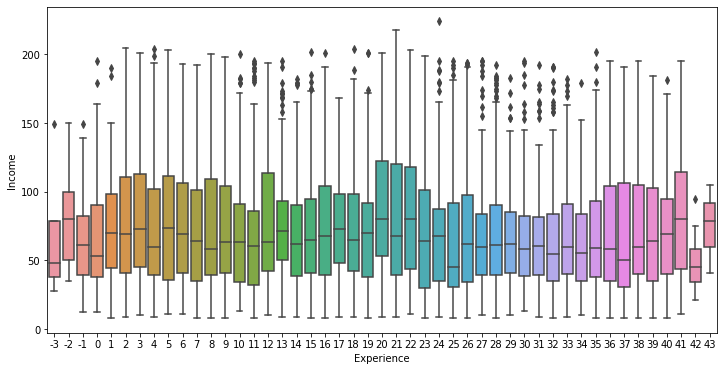

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Experience", y="Income", data=df)
plt.show()

#### Observation:

- As years of experience is highly correlated to Age, it is showing the same result as it has shown in the bivariate analysis of Income vs Age.

#### Dropping Income Column:

- As we have used log transformation to get Income_log, we can easily drop Income column from the dataset.

In [43]:
df.drop(["Income"], axis=1, inplace=True)
df.tail() #Let's see the data at the bottom of the dataset

,Age,Experience,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,county,Income_log
4995,29,3,92697,1,1.9,0,0,0,0,1,0,0,1,0,Orange County,3.688879
4996,30,4,92037,4,0.4,85,0,0,0,1,0,0,0,1,San Diego County,2.708050
4997,63,39,93023,2,0.3,0,0,0,0,0,0,0,1,0,Ventura County,3.178054
4998,65,40,90034,3,0.5,0,0,0,0,1,0,1,0,0,Los Angeles County,3.891820
4999,28,4,92612,3,0.8,0,0,0,0,1,1,0,0,1,Orange County,4.418841


# Data Processing Continued

- Create dummy variable regarding categorical column county

In [44]:
df = pd.get_dummies(df, columns=['county'])
df.head()

,Age,Experience,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,Income_log,county_Alameda County,county_Butte County,county_Contra Costa County,county_El Dorado County,county_Fresno County,county_Humboldt County,county_Imperial County,county_Kern County,county_Lake County,county_Los Angeles County,county_Marin County,county_Mendocino County,county_Merced County,county_Monterey County,county_Napa County,county_Orange County,county_Placer County,county_Riverside County,county_Sacramento County,county_San Benito County,county_San Bernardino County,county_San Diego County,county_San Francisco County,county_San Joaquin County,county_San Luis Obispo County,county_San Mateo County,county_Santa Barbara County,county_Santa Clara County,county_Santa Cruz County,county_Shasta County,county_Siskiyou County,county_Solano County,county_Sonoma County,county_Stanislaus County,county_Trinity County,county_Tuolumne County,county_Ventura County,county_Yolo County
0,25,1,91107,4,1.6,0,0,1,0,0,0,0,0,1,3.891820,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,90089,3,1.5,0,0,1,0,0,0,0,0,1,3.526361,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,94720,1,1.0,0,0,0,0,0,0,0,0,1,2.397895,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,94112,1,2.7,0,0,0,0,0,0,1,0,0,4.605170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,91330,4,1.0,0,0,0,0,0,1,1,0,0,3.806662,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5000 rows and 52 columns.


- The number of columns has increased to 53. 


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            5000 non-null   int64  
 1   Experience                     5000 non-null   int64  
 2   Family                         5000 non-null   int64  
 3   CCAvg                          5000 non-null   float64
 4   Mortgage                       5000 non-null   int64  
 5   Personal_Loan                  5000 non-null   int64  
 6   Securities_Account             5000 non-null   int64  
 7   CD_Account                     5000 non-null   int64  
 8   Online                         5000 non-null   int64  
 9   CreditCard                     5000 non-null   int64  
 10  Education_Graduate             5000 non-null   uint8  
 11  Education_Professional         5000 non-null   uint8  
 12  Education_Undergrad            5000 non-null   u

- Though the number of columns has been increased, we get all the variables in terms of numerical type.

# Spliting the data

- We will use 70% of data for training and 30% for testing.

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,Income_log,county_Alameda County,county_Butte County,county_Contra Costa County,county_El Dorado County,county_Fresno County,county_Humboldt County,county_Imperial County,county_Kern County,county_Lake County,county_Los Angeles County,county_Marin County,county_Mendocino County,county_Merced County,county_Monterey County,county_Napa County,county_Orange County,county_Placer County,county_Riverside County,county_Sacramento County,county_San Benito County,county_San Bernardino County,county_San Diego County,county_San Francisco County,county_San Joaquin County,county_San Luis Obispo County,county_San Mateo County,county_Santa Barbara County,county_Santa Clara County,county_Santa Cruz County,county_Shasta County,county_Siskiyou County,county_Solano County,county_Sonoma County,county_Stanislaus County,county_Trinity County,county_Tuolumne County,county_Ventura County,county_Yolo County
1334,47,22,2,1.3,0,0,0,1,0,0,0,1,3.555348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4768,38,14,1,2.0,0,0,0,1,0,1,0,0,3.663562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
65,59,35,1,3.8,0,0,0,1,1,0,0,1,4.875197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
177,29,3,4,1.8,244,0,0,0,0,1,0,0,4.174387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4489,39,13,3,0.2,0,0,0,1,0,1,0,0,3.044522,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Let's check the split of the data.

In [54]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Model Building:
#### Logistic Regression


We have completed splitting the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Logistic Regression model using the train data and then check it's performance.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [57]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train,y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5        6  \
0 -0.710812  0.703749  0.453761  0.291955  0.001339 -0.953759  3.15073   

          7         8         9        10        11        12        13  \
0 -0.620772 -0.999686 -0.355543 -0.082249 -3.434025  4.253078 -0.321766   

         14        15        16        17        18        19        20  \
0 -0.191171  0.160913 -0.182695 -0.190605 -0.380591 -0.049824  0.628616   

         21        22        23        24        25        26        27  \
0 -0.098089 -0.192097  0.142678 -0.194402 -0.071508 -0.315391 -0.022276   

         28        29        30        31        32        33        34  \
0 -0.296161  0.357932  0.563935  0.158386 -0.155481 -0.654882 -0.172694   

         35        36        37        38        39        40        41  \
0 -0.164582  0.112184 -0.515968 -0.967276  0.119769 -0.000857 -0.358092   

         42        43        44        45        46        47        48  \
0 -0.294335 -0.090867

#### Observations:

- Income_log is showing a positive coefficient with loan acceptace. This clearly states that the possibility of accepting loan enhances with increasing income.


In [58]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9506666666666667


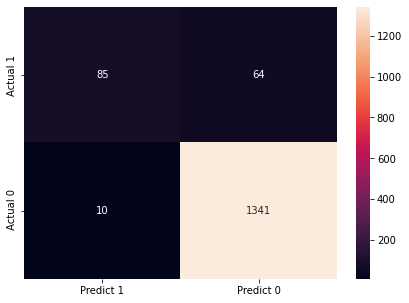

In [59]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### Observation from the confusion matrix:


- True Positives (TP): we correctly predicted that they recieve loan 85.

- True Negatives (TN): we correctly predicted that they don't recieve loan 1341.

- False Positives (FP):we incorrectly predicted that they accept loan(a "Type I error") 10 Falsely predict negative Type I error

- False Negatives (FN): we incorrectly predicted that they don't accept loan(a "Type II error") 64 Falsely predict negative Type II error

## Build Decision Tree Model

In [60]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Checking model performance on training set

In [61]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


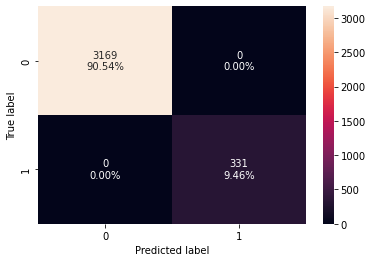

In [62]:
confusion_matrix_sklearn(model, x_train, y_train)

### Checking model performance on test set

In [63]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, x_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748


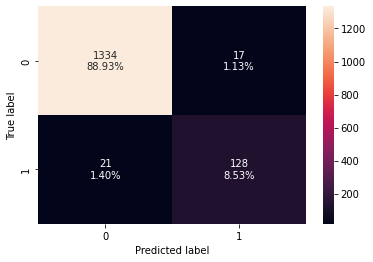

In [64]:
confusion_matrix_sklearn(model, x_test, y_test)

#### Observation:
- Model is giving good and generalized results on training and test set.

In [65]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


# Visualizing the Decision Tree

In [66]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Graduate', 'Education_Professional', 'Education_Undergrad', 'Income_log', 'county_Alameda County', 'county_Butte County', 'county_Contra Costa County', 'county_El Dorado County', 'county_Fresno County', 'county_Humboldt County', 'county_Imperial County', 'county_Kern County', 'county_Lake County', 'county_Los Angeles County', 'county_Marin County', 'county_Mendocino County', 'county_Merced County', 'county_Monterey County', 'county_Napa County', 'county_Orange County', 'county_Placer County', 'county_Riverside County', 'county_Sacramento County', 'county_San Benito County', 'county_San Bernardino County', 'county_San Diego County', 'county_San Francisco County', 'county_San Joaquin County', 'county_San Luis Obispo County', 'county_San Mateo County', 'county_Santa Barbara County', 'county_Santa Clara County', 'county_Santa Cruz County', 'county_Shasta County', 'cou

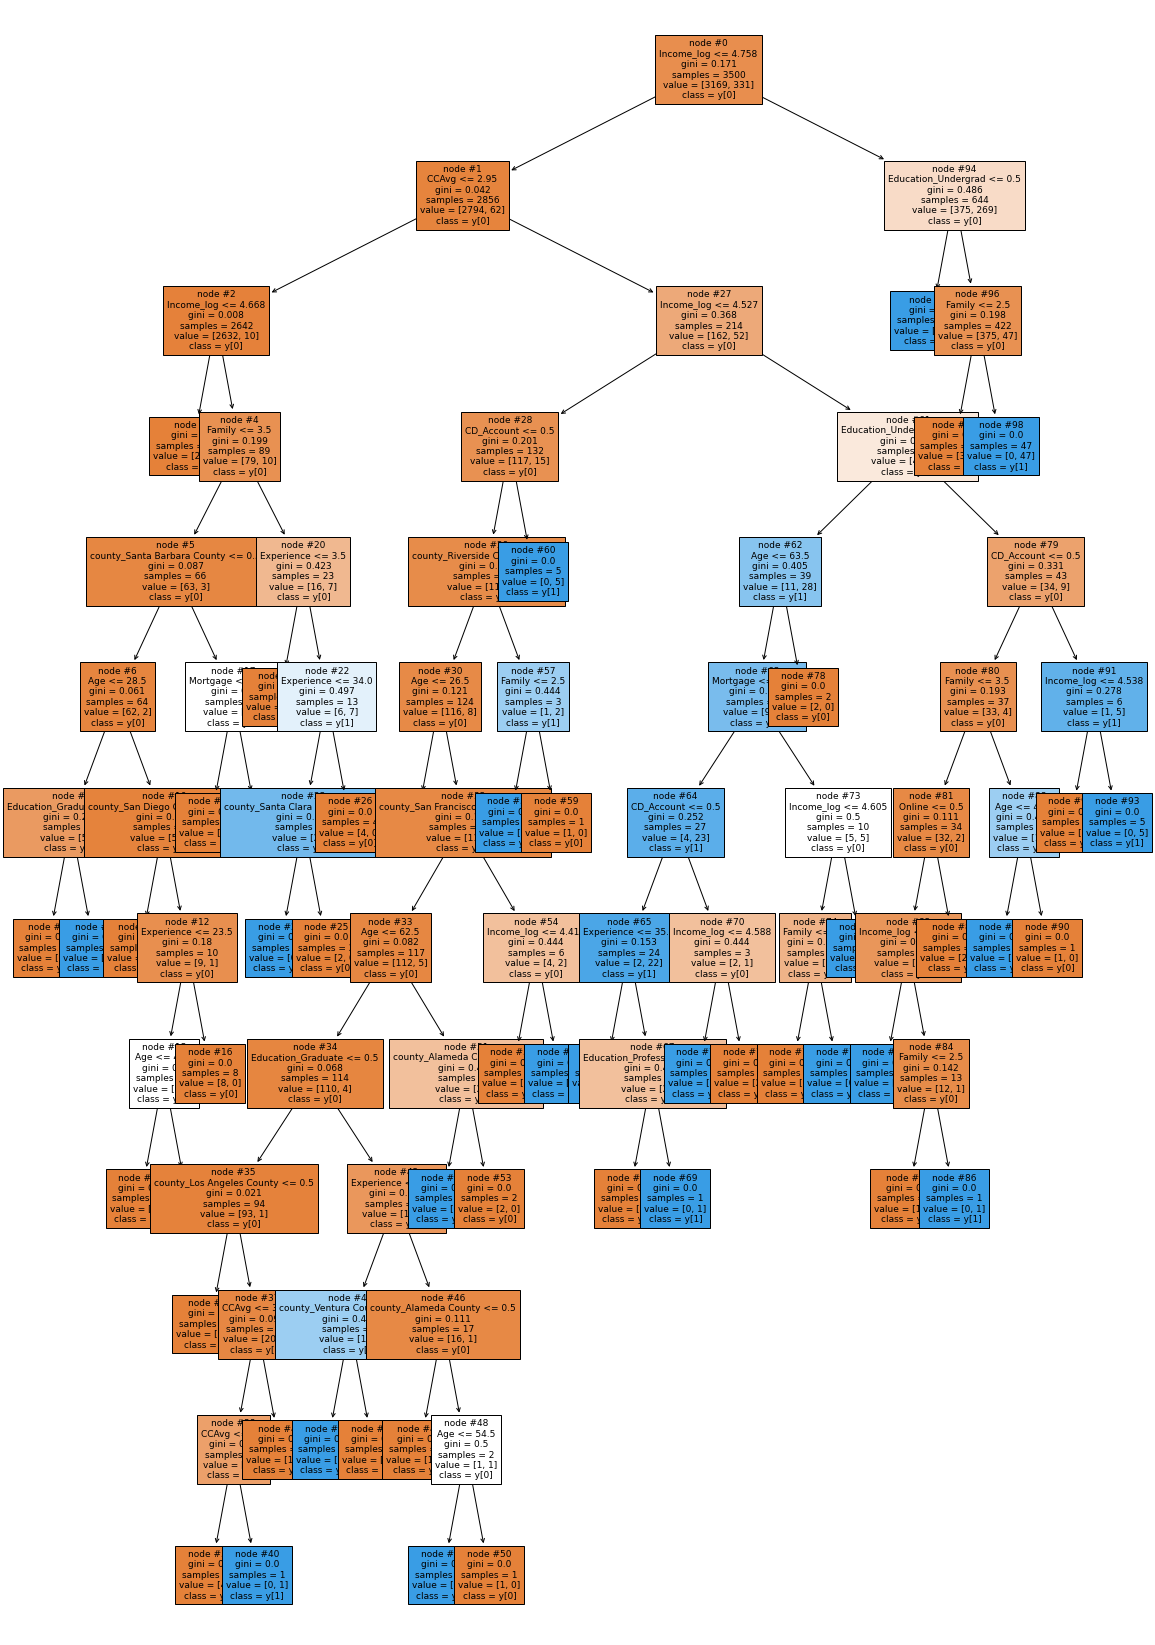

In [67]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [68]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income_log <= 4.76
|   |--- CCAvg <= 2.95
|   |   |--- Income_log <= 4.67
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income_log >  4.67
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- county_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- county_San Diego County <= 0.50
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- county_San Diego County >  0.50
|   |   |   |   |   |   |   |--- Experience <= 23.50
|   |   |   |   |   |   |   |   |--- Age <= 44.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  44.50
|   |   |   |   |   |

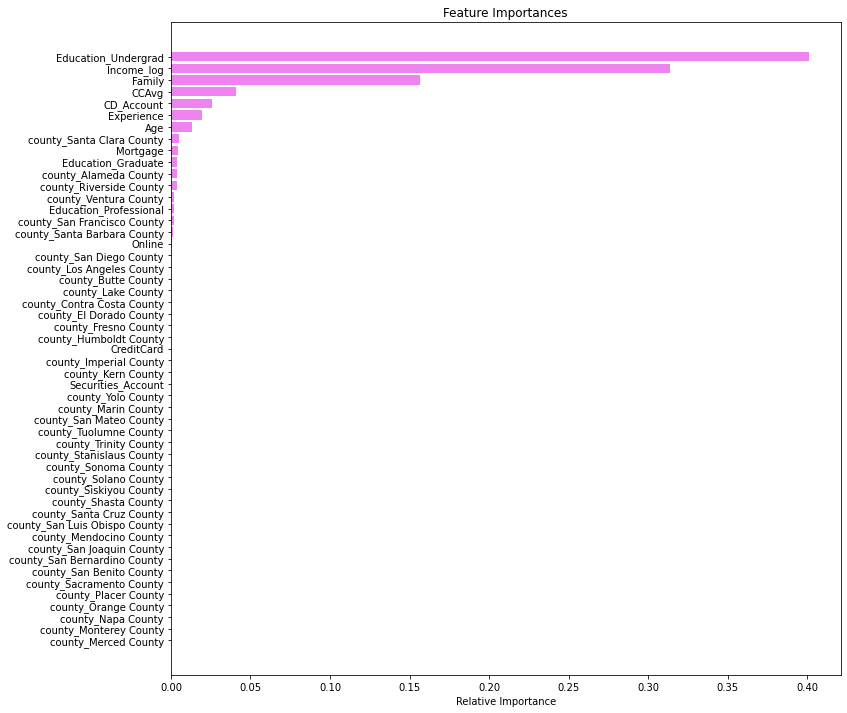

In [70]:
#Let's check the important features of this dataset
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- `Education_Undergrad`,`Income_log` and `Family` are 3 important features as per the current analysis. But we need to deep dive using GridSerachCV parameters.

#### Using GridSearch for Hyperparameter tuning of our tree model

- Let's see if we can improve our model performance even more.

In [71]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=1e-06, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

#### Checking performance on training set

In [72]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


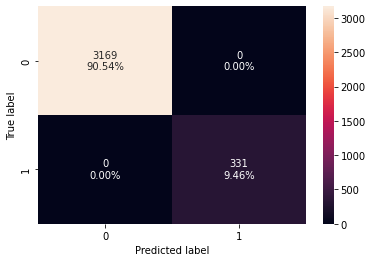

In [73]:
confusion_matrix_sklearn(estimator, x_train, y_train)

- * The Recall remains almost the same on training set as compared to the initial model.

#### Checking model performance on test set

In [74]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978,0.85906,0.914286,0.885813


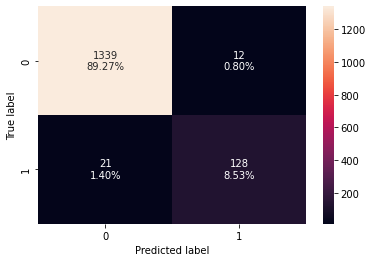

In [75]:
confusion_matrix_sklearn(estimator, x_test, y_test)

- * After hyperparameter tuning the model has performance has remained same and the model has become simpler.

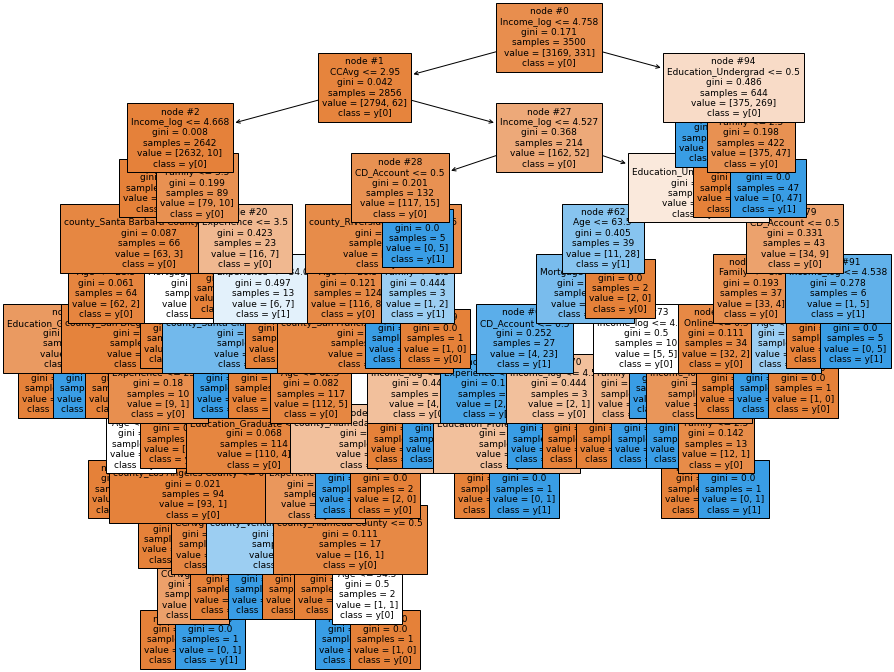

In [76]:
plt.figure(figsize=(15, 12))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- * We are getting a simplified tree after pre-pruning.

# Cost Complexity Pruning

In [77]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [78]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000188,0.001127
3,0.000269,0.002202
4,0.000269,0.002740
5,0.000326,0.004371
6,0.000359,0.005447
7,0.000381,0.005828
8,0.000381,0.006209
9,0.000381,0.006590


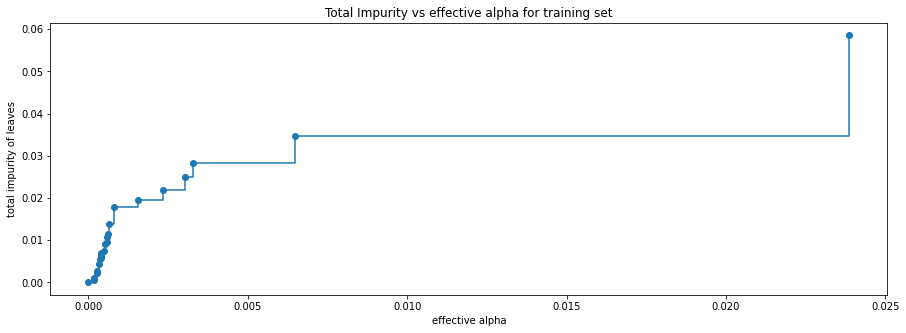

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


- For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

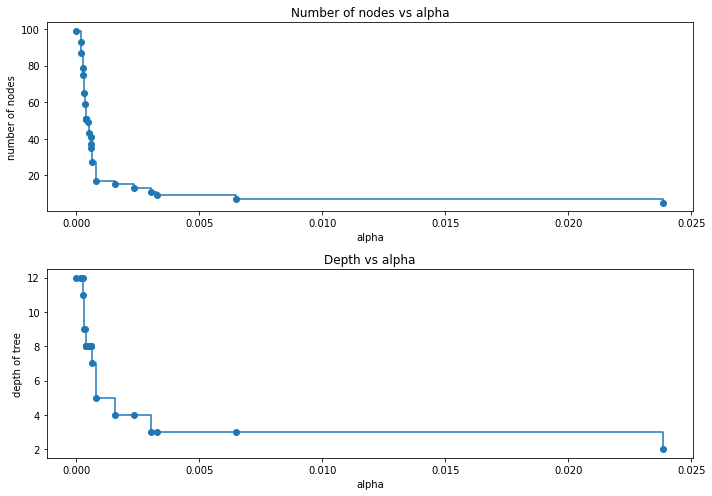

In [81]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Recall vs alpha for training and testing sets

In [82]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [83]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

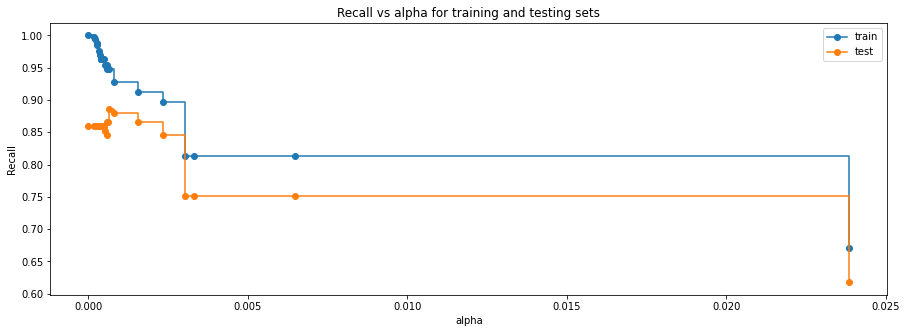

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Checking model performance on training set

In [86]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


In [87]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.991714,0.94864,0.96319,0.95586


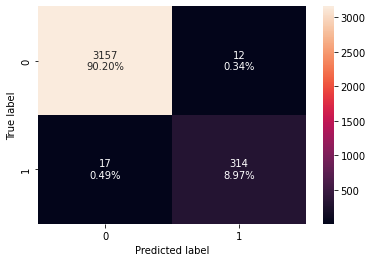

In [88]:
confusion_matrix_sklearn(best_model, x_train, y_train)

#### Checking model performance on test set

In [89]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.885906,0.929577,0.907216


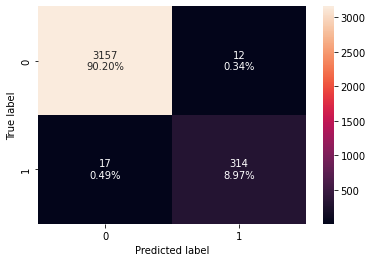

In [90]:
confusion_matrix_sklearn(best_model, x_train, y_train)

- With post-pruning we are getting good and generalized model performance on both training and test set.
- The recall has improved further.

In [91]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


# Visualizing the Decision Tree

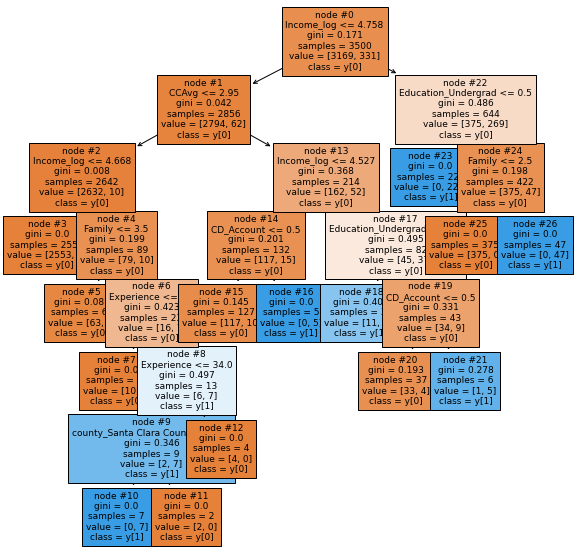

In [92]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [93]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income_log <= 4.76
|   |--- CCAvg <= 2.95
|   |   |--- Income_log <= 4.67
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income_log >  4.67
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Experience <= 34.00
|   |   |   |   |   |   |--- county_Santa Clara County <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |   |   |   |   |--- county_Santa Clara County >  0.50
|   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |--- Experience >  34.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income_log <= 4.53
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.5

- Let's find out the important features at the beginning.

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education_Undergrad            0.436448
Income_log                     0.324182
Family                         0.155849
CCAvg                          0.041142
CD_Account                     0.024692
Experience                     0.012037
county_Santa Clara County      0.005650
county_San Mateo County        0.000000
county_San Luis Obispo County  0.000000
county_San Joaquin County      0.000000
Age                            0.000000
county_San Francisco County    0.000000
county_San Diego County        0.000000
county_Santa Barbara County    0.000000
county_San Benito County       0.000000
county_Sacramento County       0.000000
county_San Bernardino County   0.000000
county_Shasta County           0.000000
county_Santa Cruz County       0.000000
county_Placer County           0.000000
county_Siskiyou County         0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Stanislaus County       0.000000


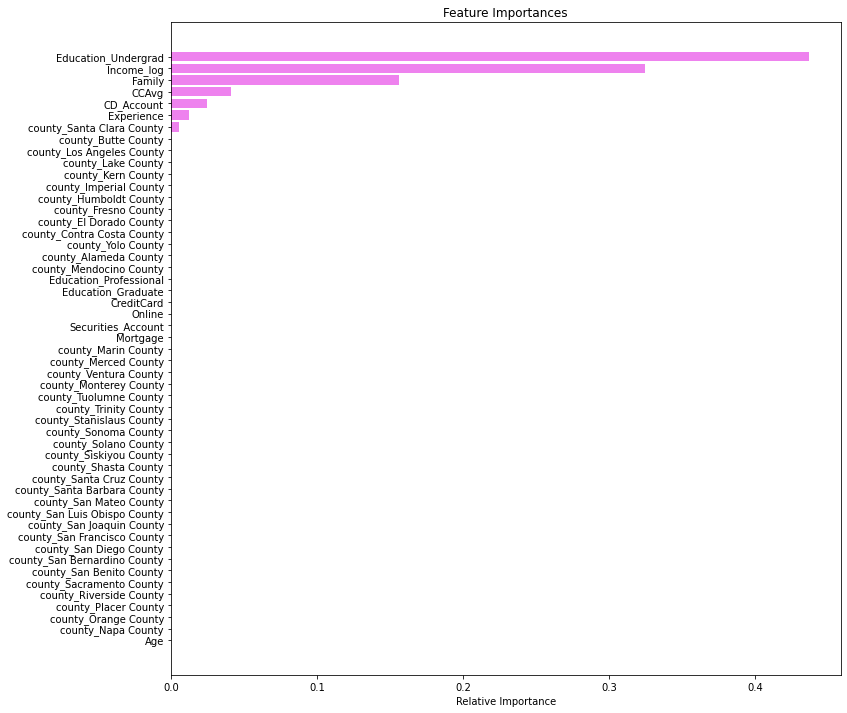

In [95]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- * `Education_Undergrad`,`Income_log` and `Family` remain the most important feature with post-pruning too.

# Comparing all the decision tree models

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.991714
Recall,1.0,1.0,0.948640
Precision,1.0,1.0,0.963190
F1,1.0,1.0,0.955860


In [97]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.974667,0.978000,0.982000
Recall,0.859060,0.859060,0.885906
Precision,0.882759,0.914286,0.929577
F1,0.870748,0.885813,0.907216


- Decision tree with post-pruning is giving the highest recall on the test set.
- The tree with post pruning is not complex and easy to interpret.

## Business Insights

* `Education_Undergrad`,`Income_log` and `Family` (in that order) are the most important variables in determining if a person will accept the loan or not. This is quite understandable. Because, the undergrad students are likely to take personal loans for fulfilling their undergrad tuition fees. The decision of taking personal loans is also relatd to the income of the person. If a person has a modest income, he is likely to take loans. Otherwise, he does not seem to be interested in taking loans. Family background and support is another key factor in loan taking decision makeing.

* The data vizualization also shows that income of a person is depending on the `Age` and `Years of Professional Experience`. This is clearly understandable. Because, the income will increase with increasing years of experience, which is linked to age. The income is also affecting the decision of taking personal loans as well.

* Criteria to approve loan according to decision tree model should depend on three main factors - `Income`, `Family` and `Education_Undergraduate lavel`.

* That means -
- * If the Income is in the higher range, the campaign can offer that person to receive a personal loan.

- * If the family background of a person is well organized in terms of financial analysis, that person is also eligible to be offered a personal loan.

- * If the person is undergraduate student with, there is a possiblility of taking personal loan for educational purpose.

